# Classification Tree

In [1]:
data_dir="C:\\Users\\IIDT\\Desktop\\python\\TERM 2"
import os
import pandas as pd

In [2]:
os.chdir(data_dir)
dat=pd.read_csv("credit_history.csv")
dat.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [3]:
dat.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [4]:
dat['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [5]:
dat['years'].fillna(4,inplace=True)

In [6]:
X=dat.drop("default",axis=1)
X.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [7]:
X=pd.get_dummies(X)
y=dat['default']

In [8]:
X.head()# here this has all the independent variables

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


In [9]:
y.head()#it is the dependent variable

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [10]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [11]:
X_train.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
773,1500,22.0,32304.0,24,0,1,0,0,0,0,0,0,0,0,1
5290,15000,18.0,78840.0,39,0,1,0,0,0,0,0,1,0,0,0
1692,3500,3.0,30000.0,22,0,0,1,0,0,0,0,0,0,0,1
2478,8400,1.0,36000.0,23,1,0,0,0,0,0,0,0,0,0,1
3138,6000,16.0,77000.0,20,1,0,0,0,0,0,0,1,0,0,0


In [12]:
y_train.head()

773     1
5290    0
1692    1
2478    1
3138    0
Name: default, dtype: int64

In [13]:
X_train.shape

(6181, 15)

In [14]:
X_test.shape

(1546, 15)

In [15]:
import sklearn.tree as tree
clf=tree.DecisionTreeClassifier(max_depth=3,random_state=200)#decision tree sholud grow until a depth of 3 only
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [16]:
#Average number of correct predictions on the test set
# with a depth of 3 we are getting 63% correct predictions
clf.score(X_test,y_test)

0.6274256144890039

In [21]:
#Predicted probabilities on test set
# here we have two classes i.e 0 and 1 so we will get 2 columns
prob=clf.predict_proba(X_test)
prob

array([[0.7838765 , 0.2161235 ],
       [0.7838765 , 0.2161235 ],
       [0.866171  , 0.133829  ],
       ...,
       [0.33271144, 0.66728856],
       [0.62803532, 0.37196468],
       [0.49720149, 0.50279851]])

In [23]:
#Area Under the curve
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,prob[:,1])#dependent values in test set,predicted probabilities)
# here we are concerned only with the 1 column therfore prob is given as prob[:,1]

0.6721250820352787

In [25]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                       proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)   
#featrure_names is all independent variables
#class name can be anything here it is 0 and 1
#filled here we will see some colors so it is given as true
#proportion : here we can get the value in proportion or it will return as count

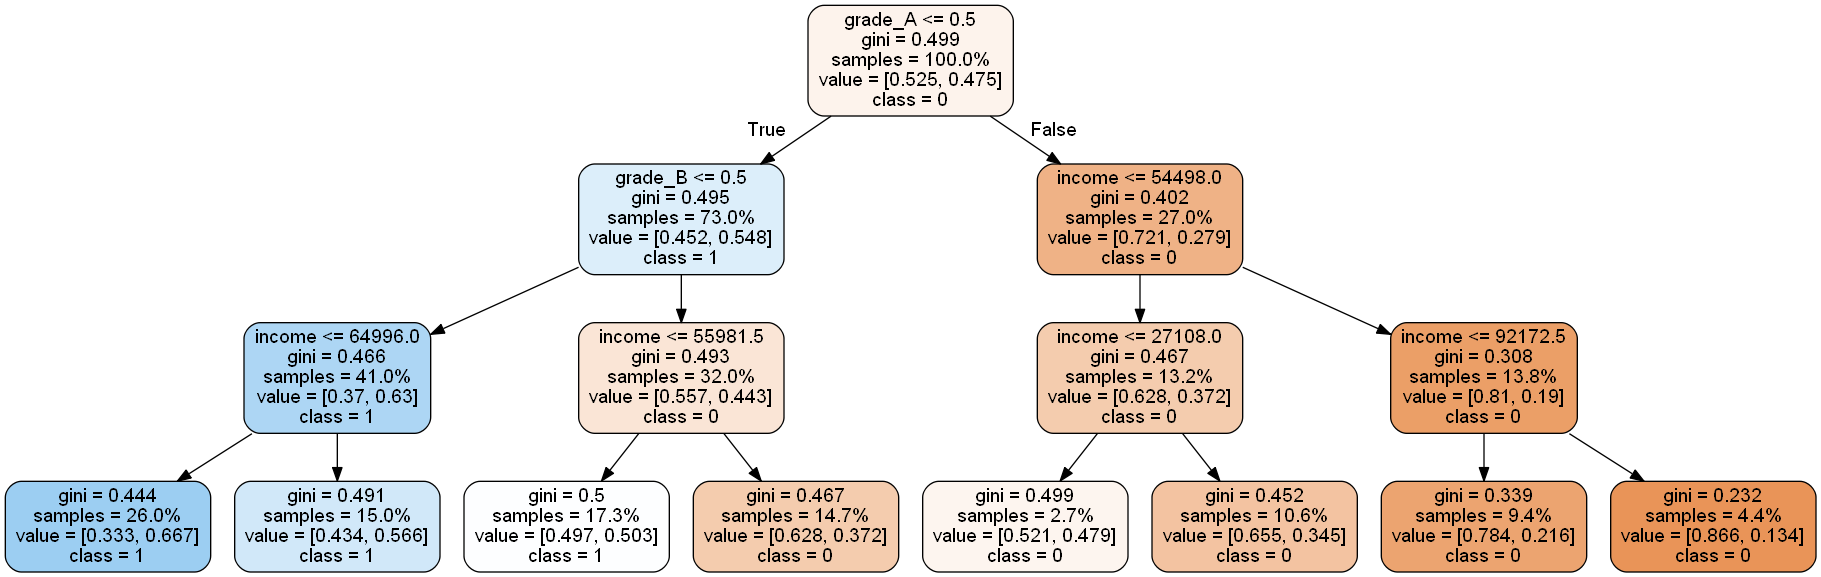

In [26]:
from IPython.display import Image
Image(graph.create_png())
#here we can get in jpg file also
#since here in the values they are almost similar the gini is 0.5

In [27]:
graph.write_jpeg("tree.jpeg")

True

In [28]:
y_train.value_counts()/len(y_train)

0    0.524511
1    0.475489
Name: default, dtype: float64

In [31]:
#Grid search/cross validation
# here we are checking which depth is good in max_depth
model=model_selection.GridSearchCV(clf, param_grid={'max_depth':[3,4,5,7],'criterion':['gini','entropy']})# all the hyper parameters are passed as dictionary
model.fit(X_train,y_train)

C:\Users\IIDT\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=3,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=200,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 7]},
             pre_dispat

In [32]:
#best model
model.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [33]:
model.best_score_

0.6298333602976864

In [44]:
#here we are creating with a max_depth of 5
clf=tree.DecisionTreeClassifier(max_depth=5,random_state=200)
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=200, splitter='best')

In [45]:
# for the max_depth = 5 this is the feature importance
pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

ValueError: Length of passed values is 16, index implies 15

In [34]:
#import sklearn.metrics as metrics max_depth=3
metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.6760493818892891

In [35]:
#Feature importance
# for a max_depth =3
# to know the important variables for my analysis we will use feature importance
pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

grade_A               0.554912
grade_B               0.245647
income                0.199442
ownership_RENT        0.000000
ownership_OWN         0.000000
ownership_OTHER       0.000000
ownership_MORTGAGE    0.000000
grade_G               0.000000
grade_F               0.000000
grade_E               0.000000
grade_D               0.000000
grade_C               0.000000
age                   0.000000
years                 0.000000
amount                0.000000
dtype: float64

In [39]:
X_train['index']=clf.apply(X_train)
X_train['index'].unique()

C:\Users\IIDT\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([20, 27,  5, 46, 51, 23, 13, 47, 21, 16, 12,  8, 55, 15, 61, 36, 62,
        6, 59, 44, 39,  9, 54, 24, 28, 58, 37, 31, 52, 30, 43, 40],
      dtype=int64)

In [40]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         class_names=["0","1"],  
                         filled=True, rounded=True,  
                       proportion=True)
graph = pydotplus.graph_from_dot_data(dot_data)   

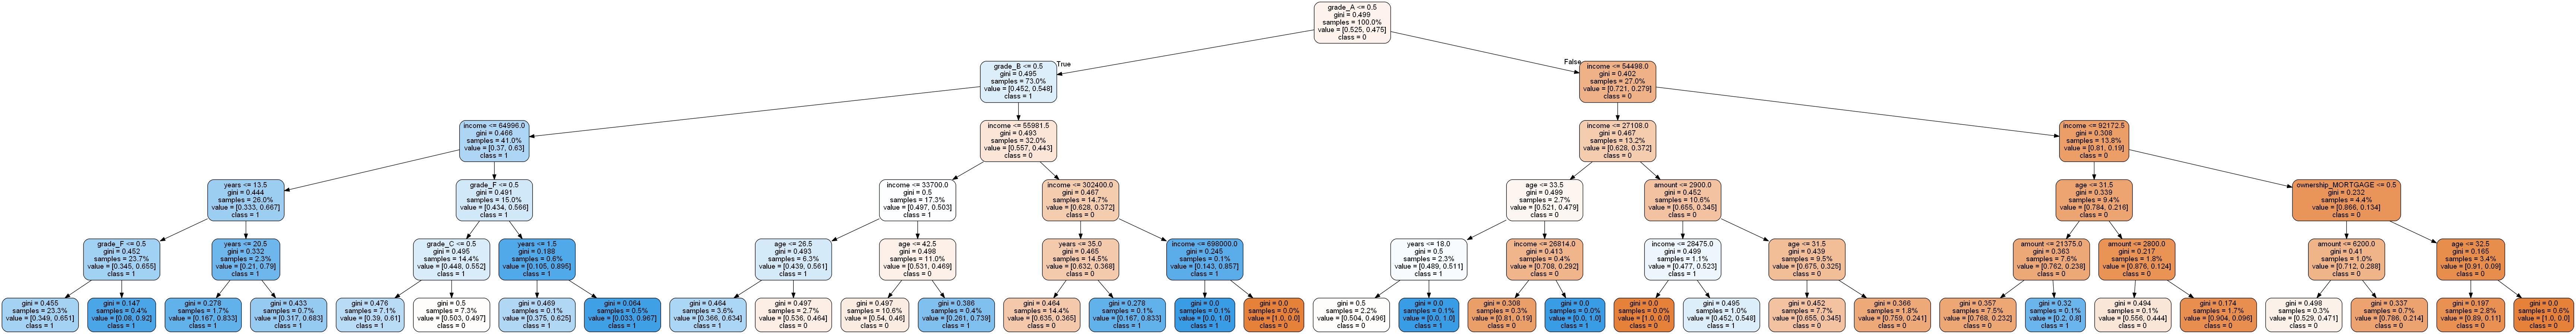

In [41]:
from IPython.display import Image
Image(graph.create_png())

In [42]:
# for max_depth=5
# best score
model.best_score_

0.6298333602976864

In [43]:
# max_depth=5
metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])

0.6760493818892891

# Regression Tree

In [46]:
os.chdir(data_dir)
dat=pd.read_csv("dm.csv")
dat.isnull().sum()/dat.shape[0]

Age            0.000
Gender         0.000
OwnHome        0.000
Married        0.000
Location       0.000
Salary         0.000
Children       0.000
History        0.303
Catalogs       0.000
AmountSpent    0.000
Cust_Id        0.000
dtype: float64

In [47]:
dat.shape

(1000, 11)

In [48]:
import os
import pandas as pd

dat=pd.read_csv("dm.csv")
dat.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id'],
      dtype='object')

In [49]:
dat['History']=dat['History'].fillna('Missing',axis=0)
dat['History'].head()

0    High
1    High
2     Low
3    High
4    High
Name: History, dtype: object

In [51]:
dat['History'].value_counts()

Missing    303
High       255
Low        230
Medium     212
Name: History, dtype: int64

In [52]:
dat.shape

(1000, 11)

In [53]:
X=dat.drop(['Cust_Id','AmountSpent'],axis=1)
X=pd.get_dummies(X)
y=dat['AmountSpent']

In [54]:
dat['History'].unique()

array(['High', 'Low', 'Medium', 'Missing'], dtype=object)

In [55]:
X.columns

Index(['Salary', 'Children', 'Catalogs', 'Age_Middle', 'Age_Old', 'Age_Young',
       'Gender_Female', 'Gender_Male', 'OwnHome_Own', 'OwnHome_Rent',
       'Married_Married', 'Married_Single', 'Location_Close', 'Location_Far',
       'History_High', 'History_Low', 'History_Medium', 'History_Missing'],
      dtype='object')

In [56]:
import sklearn.model_selection as model_selection

X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [57]:
X_train.shape

(800, 18)

In [58]:
X_train.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium,History_Missing
989,102700,1,18,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0
835,10600,2,24,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1
678,10900,0,24,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0
177,28900,0,12,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0
410,54600,0,24,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0


In [59]:
y_train.head()

989    3785
835     517
678     407
177     830
410    1246
Name: AmountSpent, dtype: int64

In [60]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3,random_state=1)
reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1, splitter='best')

In [61]:
#R square , here it will return R square value, for test set
reg.score(X_test,y_test)

0.5915701153457273

In [62]:
reg.score(X_train,y_train)
# for training set

0.6263572707531433

In [63]:
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X_train.columns,  
                         filled=True, rounded=True)

In [65]:
graph = pydotplus.graph_from_dot_data(dot_data)   



In [66]:
graph.write_jpeg("tree_reg.jpeg")

True

In [67]:
X.columns

Index(['Salary', 'Children', 'Catalogs', 'Age_Middle', 'Age_Old', 'Age_Young',
       'Gender_Female', 'Gender_Male', 'OwnHome_Own', 'OwnHome_Rent',
       'Married_Married', 'Married_Single', 'Location_Close', 'Location_Far',
       'History_High', 'History_Low', 'History_Medium', 'History_Missing'],
      dtype='object')

In [68]:
reg.predict(X_test)
# since in regression predicted values returns the average only therefore the values are getting repeated.

array([1252.45454545, 2420.41714286,  916.57416268, 1466.84507042,
       2420.41714286,  505.53608247,  916.57416268,  338.22222222,
        916.57416268,  916.57416268, 2420.41714286,  505.53608247,
        505.53608247, 1466.84507042,  297.96491228, 1466.84507042,
        505.53608247,  916.57416268,  297.96491228,  505.53608247,
        505.53608247, 1252.45454545, 2420.41714286, 2420.41714286,
        505.53608247, 1466.84507042,  916.57416268, 1466.84507042,
        297.96491228,  916.57416268,  338.22222222,  338.22222222,
       2420.41714286, 1466.84507042,  297.96491228, 2420.41714286,
       1466.84507042, 1466.84507042, 2420.41714286,  916.57416268,
        916.57416268,  505.53608247, 1466.84507042, 1466.84507042,
        916.57416268,  505.53608247,  338.22222222,  916.57416268,
        916.57416268, 2420.41714286,  505.53608247,  505.53608247,
        505.53608247, 2420.41714286,  505.53608247, 2420.41714286,
        916.57416268,  916.57416268, 2420.41714286, 2420.41714

In [69]:
import sklearn.metrics

In [70]:
sklearn.metrics.mean_squared_error(y_test,reg.predict(X_test))

421270.24467456294

In [71]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422, 0.        ])

In [72]:
#Feature Importance: Total reduction of purity measure brought out by a feature
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False)

Salary             0.680609
Catalogs           0.177714
History_Medium     0.059444
History_Low        0.045373
History_High       0.036859
Gender_Female      0.000000
Children           0.000000
Age_Middle         0.000000
Age_Old            0.000000
Age_Young          0.000000
History_Missing    0.000000
Gender_Male        0.000000
OwnHome_Rent       0.000000
Married_Married    0.000000
Married_Single     0.000000
Location_Close     0.000000
Location_Far       0.000000
OwnHome_Own        0.000000
dtype: float64

In [73]:
y_train.mean()

1227.12625

In [74]:
y1=pd.Series([y_train.mean()]*800)# here we are multiplicating with 800 since we have 800 records
y1.head()

0    1227.12625
1    1227.12625
2    1227.12625
3    1227.12625
4    1227.12625
dtype: float64

In [75]:
sklearn.metrics.mean_squared_error(y_train,y1)

895015.6853109375